## Stochastic SIR model with Python

### Libraries

In [1]:
import numpy as np
import math
import pandas as pd
import pythran

In [2]:
%load_ext pythran.magic

In [3]:
np.random.seed(123)

### Plain Python version

In [4]:
def sir(u,parms,t):
    bet,gamm,iota,N,dt=parms
    S,I,R,Y=u
    lambd = bet*(I+iota)/N
    ifrac = 1.0 - math.exp(-lambd*dt)
    rfrac = 1.0 - math.exp(-gamm*dt)
    infection = np.random.binomial(S,ifrac)
    recovery = np.random.binomial(I,rfrac)
    return [S-infection,I+infection-recovery,R+recovery,Y+infection]

def simulate():
    parms = [0.1, 0.05, 0.01, 1000.0, 0.1]
    tf = 200
    tl = 2001
    t = np.linspace(0,tf,tl)
    S = np.zeros(tl)
    I = np.zeros(tl)
    R = np.zeros(tl)
    Y = np.zeros(tl)
    u = [999,1,0,0]
    S[0],I[0],R[0],Y[0] = u
    for j in range(1,tl):
        u = sir(u,parms,t[j])
        S[j],I[j],R[j],Y[j] = u
    return {'t':t,'S':S,'I':I,'R':R,'Y':Y}

In [5]:
%timeit simulate()

9.01 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
sir_out = pd.DataFrame(simulate())

In [7]:
sir_out

,t,S,I,R,Y
0,0.0,999.0,1.0,0.0,0.0
1,0.1,999.0,1.0,0.0,0.0
2,0.2,999.0,1.0,0.0,0.0
3,0.3,999.0,1.0,0.0,0.0
4,0.4,999.0,1.0,0.0,0.0
5,0.5,999.0,1.0,0.0,0.0
6,0.6,999.0,1.0,0.0,0.0
7,0.7,999.0,1.0,0.0,0.0
8,0.8,999.0,1.0,0.0,0.0
9,0.9,999.0,1.0,0.0,0.0


## Pythran compiled version

As the above code only uses simple Python and Numpy times, it is straightforward to obtain compiled versions of the code using Pythran.

In [8]:
%%pythran -DUSE_XSIMD -march=native -O3

import numpy as np
import math

#pythran export sirp(float64 list, float64 list, float64)
def sirp(u,parms,t):
    bet,gamm,iota,N,dt=parms
    S,I,R,Y=u
    lambd = bet*(I+iota)/N
    ifrac = 1.0 - math.exp(-lambd*dt)
    rfrac = 1.0 - math.exp(-gamm*dt)
    infection = np.random.binomial(S,ifrac)
    recovery = np.random.binomial(I,rfrac)
    return [S-infection,I+infection-recovery,R+recovery,Y+infection]

#pythran export simulatep()
def simulatep():
    parms = [0.1, 0.05, 0.01, 1000.0, 0.1]
    tf = 200
    tl = 2001
    t = np.linspace(0,tf,tl)
    S = np.zeros(tl)
    I = np.zeros(tl)
    R = np.zeros(tl)
    Y = np.zeros(tl)
    u = [999,1,0,0]
    S[0],I[0],R[0],Y[0] = u
    for j in range(1,tl):
        u = sirp(u,parms,t[j])
        S[j],I[j],R[j],Y[j] = u
    return {'t':t,'S':S,'I':I,'R':R,'Y':Y}

/tmp/tmpnwyiqhs7/source.c:1:10: fatal error: cblas.h: No such file or directory
 #include <cblas.h>
          ^~~~~~~~~
compilation terminated.
/tmp/tmpnwyiqhs7/source.c:1:10: fatal error: cblas.h: No such file or directory
 #include <cblas.h>
          ^~~~~~~~~
compilation terminated.


In [9]:
%timeit simulatep()

434 µs ± 18.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


This is around two orders of magnitude faster than the vanilla Python code.

In [10]:
sir_outp = pd.DataFrame(simulatep())

In [11]:
sir_outp

,Y,R,I,S,t
0,0.0,0.0,1.0,999.0,0.0
1,0.0,0.0,1.0,999.0,0.1
2,0.0,0.0,1.0,999.0,0.2
3,0.0,0.0,1.0,999.0,0.3
4,0.0,0.0,1.0,999.0,0.4
5,0.0,0.0,1.0,999.0,0.5
6,0.0,0.0,1.0,999.0,0.6
7,0.0,0.0,1.0,999.0,0.7
8,0.0,0.0,1.0,999.0,0.8
9,0.0,0.0,1.0,999.0,0.9


### Visualisation

In [12]:
import matplotlib.pyplot as plt

In [13]:
plt.style.use("ggplot")

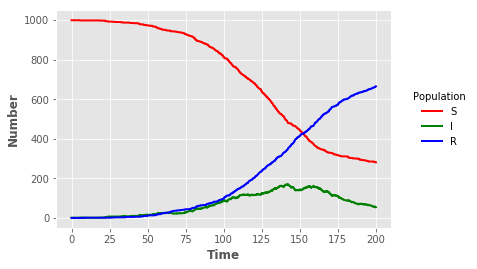

In [14]:
sline = plt.plot("t","S","",data=sir_out,color="red",linewidth=2)
iline = plt.plot("t","I","",data=sir_out,color="green",linewidth=2)
rline = plt.plot("t","R","",data=sir_out,color="blue",linewidth=2)
plt.xlabel("Time",fontweight="bold")
plt.ylabel("Number",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)